# Color quantization

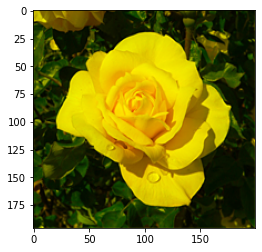

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("../Data/blomma.png")

# convert BGR to RGB
flower = img[:,:, [2, 1, 0]]

plt.imshow(flower)

(318, 425, 3)


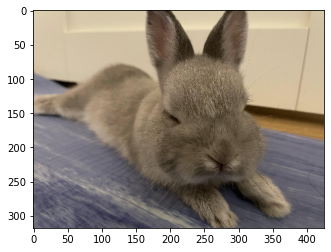

In [23]:
img = cv2.imread("../Data/bella.jpeg")
rabbit = img[:,:, [2, 1, 0]]

# make image smaller
resize_factor = .3
width = rabbit.shape[1]
height = rabbit.shape[0]
rabbit = cv2.resize(rabbit, (int(width * resize_factor), int(height * resize_factor)))

print(rabbit.shape)
plt.imshow(rabbit);

# Color quantization

(39200, 3)
Values before scaling: 0, 255
Cluster centers: [[0.12594709 0.16445658 0.        ]
 [0.86960004 0.75798583 0.        ]]


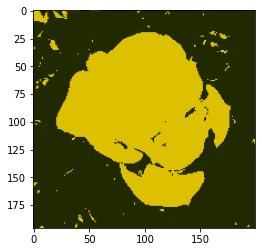

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X_flower = flower.reshape(-1, 3)
print(X_flower.shape)

print(f"Values before scaling: {X_flower.min()}, {X_flower.max()}")

scaler = MinMaxScaler()
scaled_X_flower = scaler.fit_transform(X_flower)

kmeans = KMeans(2)
kmeans.fit(scaled_X_flower)

print(f"Cluster centers: {kmeans.cluster_centers_}")

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_flower = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized_flower);

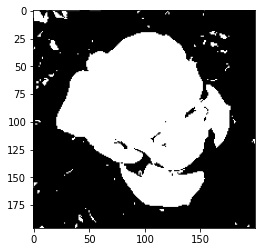

In [58]:
mask = quantized_flower[:,:,1] > .7
plt.imshow(mask, cmap = "gray")

Morphological operations can be used to remove noice

In [63]:
mask.shape, mask[:,:,None].shape

((196, 200), (196, 200, 1))

(-0.5, 199.5, 195.5, -0.5)

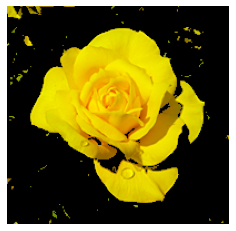

In [77]:
segmented_flower = mask[:,:, None] * flower
plt.imshow(segmented_flower)
plt.axis("off");

## Reducing colors

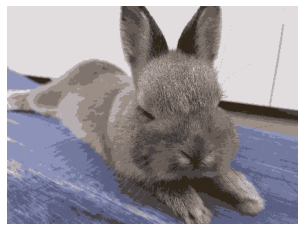

In [78]:
X_rabbit = rabbit.reshape(-1, 3)
scaled_X_rabbit = scaler.fit_transform(X_rabbit)

kmeans = KMeans(10)
kmeans.fit(scaled_X_rabbit)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_rabbit = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized_rabbit)
plt.axis("off");